<a href="https://colab.research.google.com/github/jomontoyac/Bash-for-data-science/blob/master/Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
x = [0.1087,  0.2698,  0.3765,  0.2146,  0.9155,
     0.0246,  0.0221,  0.8632,  0.6460,  0.2092,
     0.8567,  0.1591,  0.9647,  0.6231,  0.7460,
     0.3654,  0.3065,  0.6886,  0.4966,  0.2008,
     0.2618,  0.7607,  0.1563,  0.4424,  0.7731]

d = [0.9519,  1.1237,  1.2360,  1.0526,  2.0743,
     0.7906,  0.7603,  2.0533,  1.6887,  1.0563,
     2.0991,  0.8953,  2.1917,  1.6266,  1.8508,
     1.2828,  1.2283,  1.8722,  1.4657,  1.0418,
     1.1097,  1.7826,  0.9711,  1.4267,  1.8248]

In [0]:
def SSE(w0, w1):
    return (sum( [(v - w0 - w1*u)**2  for u, v in zip(x, d)] ))
 

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

##
## Generación de una malla de puntos
## y valor del SSE en cada punto
##
W0 = np.arange(-0.5, 3.0, 0.05)
W1 = np.arange(-0.5, 3.0, 0.05)
W0, W1 = np.meshgrid(W0, W1)
F = SSE(W0, W1)

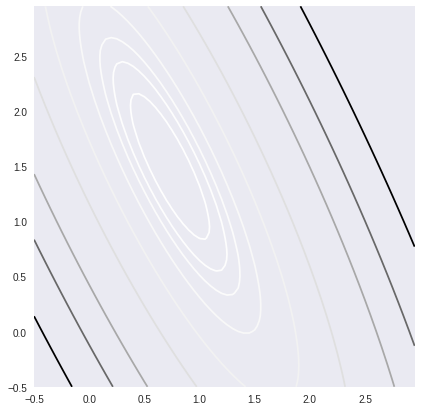

In [22]:
## Contorno
##
def plot_contour():
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect('equal', 'box')
    ax.contour(W0, W1, F, levels=[0, 1, 2, 3, 5, 10, 20, 40, 60, 90])
    ax.grid()

plot_contour()

In [0]:
##  Preparación
##
import tensorflow as tf

##
## datos
##
x = tf.constant(x)
d = tf.constant(d)

## parámetros
w0 = tf.Variable(2.5)
w1 = tf.Variable(2.5)




In [14]:
## parámetros
max_iter = 10000 # número total de iteraciones
R = 3.0         # radio inicial de búsqueda
alpha = 0.999   # factor de reducción del radio R de búsqueda
beta  = 0.95    # factor de reducción del factor de aceptación
K = 20          # factor de aceptación
delta = 100

## punto inicial aleatorio
x_opt = np.random.rand() * 9 - 4
y_opt = np.random.rand() * 9 - 4
F_opt = F(x, y, delta)
f_opt = f(x, y)

history_F = []
history_F_opt = []

## optimización
for n in range(max_iter):

    ## genera un vector unitario
    ## con dirección aleatoria
    dx = 2 * np.random.rand() - 1
    dy = 2 * np.random.rand() - 1
    d  = math.sqrt(dx**2 + dy**2)
    dx = dx / d
    dy = dy / d

    ## genera un punto aleatorio dentro de
    ## la circunferencia de radio R y con centro
    ## en el optimo actual
    x = x_opt + R * np.random.rand() * dx
    y = y_opt + R * np.random.rand() * dy
    fxy = f(x, y)
    Fxy = F(x, y, delta)

    ## calcula el delta entre el optimo actual
    ## y el punto aleatorio
    deltaF = Fxy - F_opt

    history_F.append(Fxy)
    if deltaF <= K:
        x_opt = x
        y_opt = y
        F_opt = Fxy
        f_opt = fxy
    history_F_opt.append(F_opt)

    R = R * alpha
    K = K * beta

print('x = {:6.4f}, y = {:6.5f}, f(x,y) = {:6.4f}'.format(x_opt, y_opt, f_opt))
plt.plot(history_F, '-g');
plt.plot(history_F_opt, '-r');

NameError: ignored